In [11]:
%load_ext autoreload
%autoreload 2

In [42]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import helper functions from the functions.py file
import functions as f

TTN_BIN = 4277
TTN_BINS = [4275, 4276, 4277, 4278]
chrom2_bins = [2490, 4911]

In [304]:
contact_matrix = f.generate_sample_matrix_bins(15)
contact_matrix = np.load('/Users/ethan/Desktop/chromatin-heart-dev/samples/contact_matrix_100kb_balanced.npy')

In [3]:
# LOAD BIN MAP
bin_map = f.load_bin_map('/Users/ethan/Desktop/chromatin-heart-dev/data/bin_map_human_100000.bed')

## Finding TTN Clique

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

def clique_to_graph(graph_data, spacing=1.0, selected_bin=None, verbose=False):
    nodes = graph_data['nodes']
    edges = graph_data['edges']

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(edges)


    if not verbose:
      return G


    pos = nx.spring_layout(G, k=spacing, seed=42)  # Adjust spacing

    plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

    # Set node colors: red for selected_bin, skyblue for others
    node_colors = ['red' if node == selected_bin else 'skyblue' for node in nodes]

    nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors,
            font_size=15, font_weight='bold', edge_color='gray')

    labels = nx.get_edge_attributes(G, 'weight')
    labels = {k: f"{v:.5f}" for k, v in labels.items()}  # Format weights to 5 decimals
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')

    plt.show()
    return G

TTN CLIQUE AVG INTERACTION:  0.00787203716078118


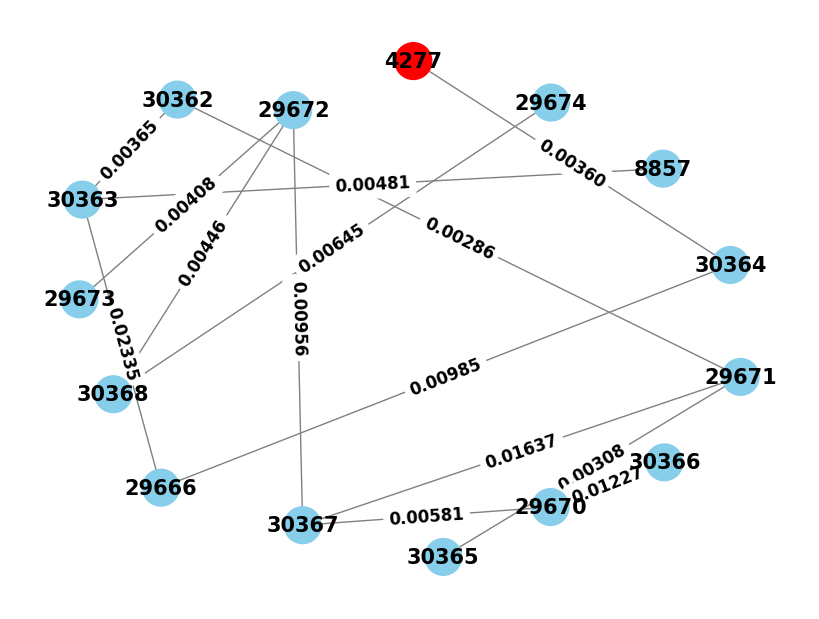

In [348]:
TTN_BIN = 4277
ttn_clique = f.find_clique_greedy(contact_matrix, 15, TTN_BIN, bin_map)
print("TTN CLIQUE AVG INTERACTION: ", ttn_clique['score']) 
G_TTN = clique_to_graph(ttn_clique, selected_bin=TTN_BIN, verbose=True)

## Background Model Generation

Processing: 100%|██████████| 1000/1000 [02:10<00:00,  7.64iteration/s]


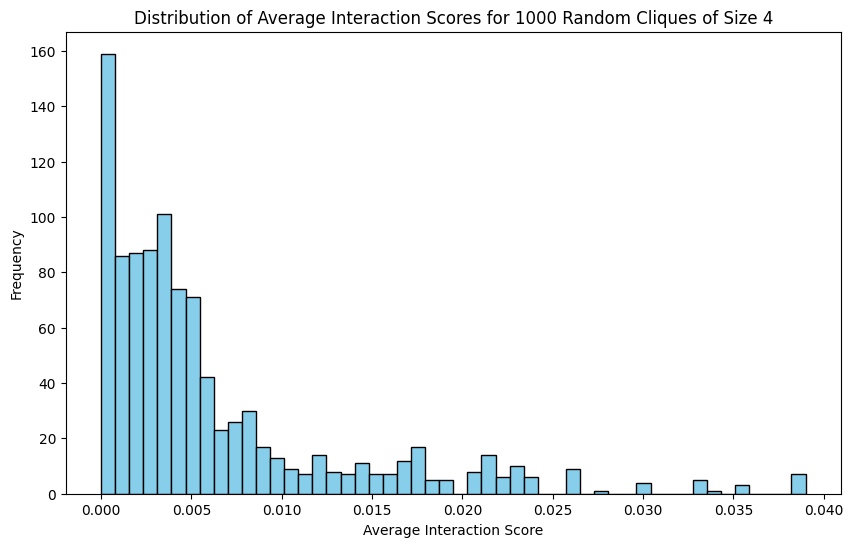

In [49]:
scores = f.create_background_model_greedy(contact_matrix, 4, bin_map, 1000)

Processing: 100%|██████████| 100/100 [01:00<00:00,  1.65iteration/s]


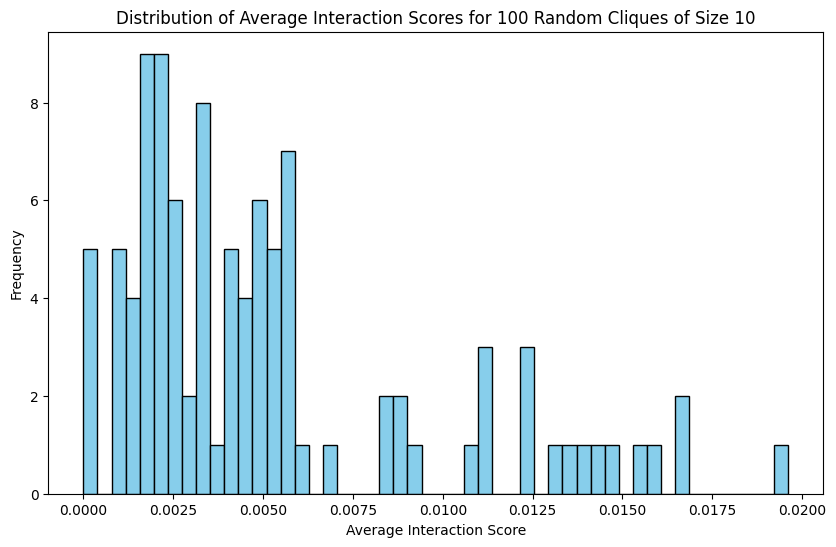

In [51]:
scores = f.create_background_model_greedy(contact_matrix, 10, bin_map, 100)

Processing: 100%|██████████| 100/100 [02:18<00:00,  1.39s/iteration]


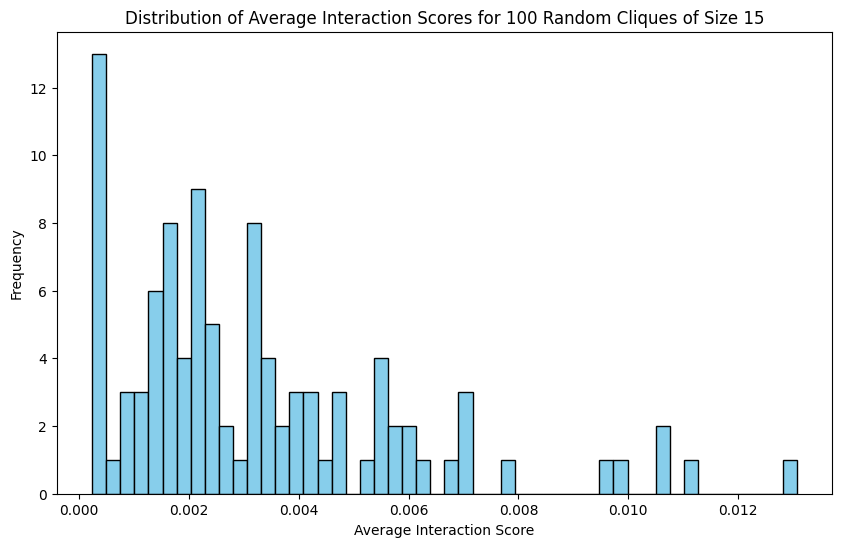

In [59]:
scores = f.create_background_model_greedy(contact_matrix, 15, bin_map, 100)

Processing: 100%|██████████| 100/100 [04:17<00:00,  2.58s/iteration]


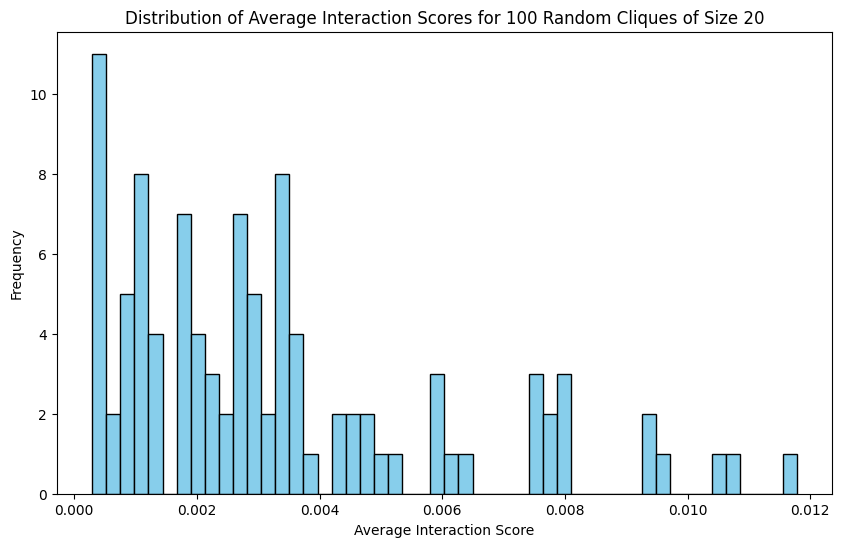

In [339]:
scores = f.create_background_model_greedy(contact_matrix, 20, bin_map, 100)

## Diffusion

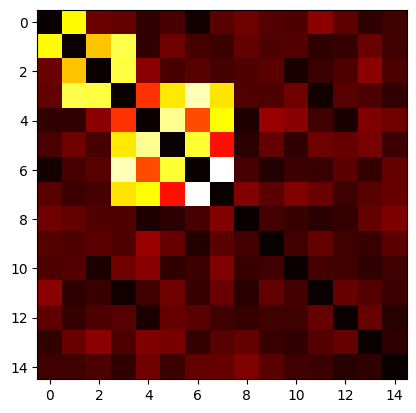

In [ ]:
# create a sample matrix
contact_matrix = f.generate_sample_matrix_bins(15)

# visualize the contact matrix hic 
plt.imshow(contact_matrix, cmap='hot', interpolation='nearest')
plt.show()


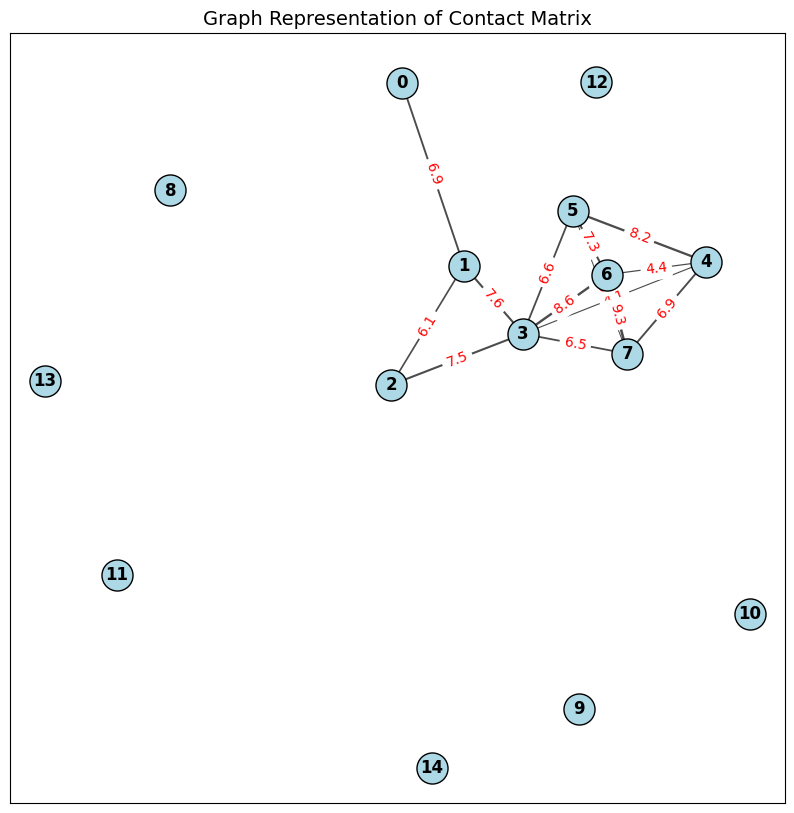

In [271]:


# zero out cm if not above 2
contact_matrix = np.where(contact_matrix < 2, 0, contact_matrix)

# plot this on a graph
G = f.construct_graph_from_contact_matrix(contact_matrix, threshold=0)



In [290]:
contact_matrix[2]

array([0.        , 6.0969454 , 0.        , 7.48686075, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [344]:
contact_matrix_zero = np.load('/Users/ethan/Desktop/chromatin-heart-dev/samples/contact_matrix_100kb_balanced_zeroed.npy')

In [347]:
f.random_walk(contact_matrix_zero, TTN_BIN, 10, num_steps=2000, num_molecules=100)    

100%|██████████| 100/100 [00:29<00:00,  3.35it/s]


(array([ 4277, 27890, 28473, 16607, 18716, 11032, 27710, 23400,  7026,
        28648]),
 np.float64(3.6747036352976394e-05))

In [321]:
f.stable_random_walk(contact_matrix_zero, TTN_BINS, num_steps=1000, num_molecules=100, num_runs=10, top_n=5)

100%|██████████| 10/10 [03:07<00:00, 18.72s/it]


(array([ 4275,  4277,  4278,  4276, 30365, 27881, 28247, 30430, 27433]),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(30894,)))

Processing:   0%|          | 0/10 [00:00<?, ?molecule/s]

random_idx: 5974


Processing:  10%|█         | 1/10 [00:17<02:36, 17.42s/molecule]

random_idx: 2650


Processing:  20%|██        | 2/10 [00:35<02:20, 17.60s/molecule]

random_idx: 22623


Processing:  30%|███       | 3/10 [00:53<02:05, 17.93s/molecule]

random_idx: 21520


Processing:  40%|████      | 4/10 [01:10<01:45, 17.51s/molecule]

random_idx: 25391


Processing:  50%|█████     | 5/10 [01:27<01:26, 17.36s/molecule]

random_idx: 693


Processing:  60%|██████    | 6/10 [01:43<01:08, 17.07s/molecule]

random_idx: 16908


Processing:  70%|███████   | 7/10 [02:04<00:54, 18.18s/molecule]

random_idx: 2987


Processing:  80%|████████  | 8/10 [02:21<00:35, 17.94s/molecule]

random_idx: 18684


Processing:  90%|█████████ | 9/10 [02:39<00:17, 17.88s/molecule]

random_idx: 10350


Processing: 100%|██████████| 10/10 [02:58<00:00, 17.89s/molecule]


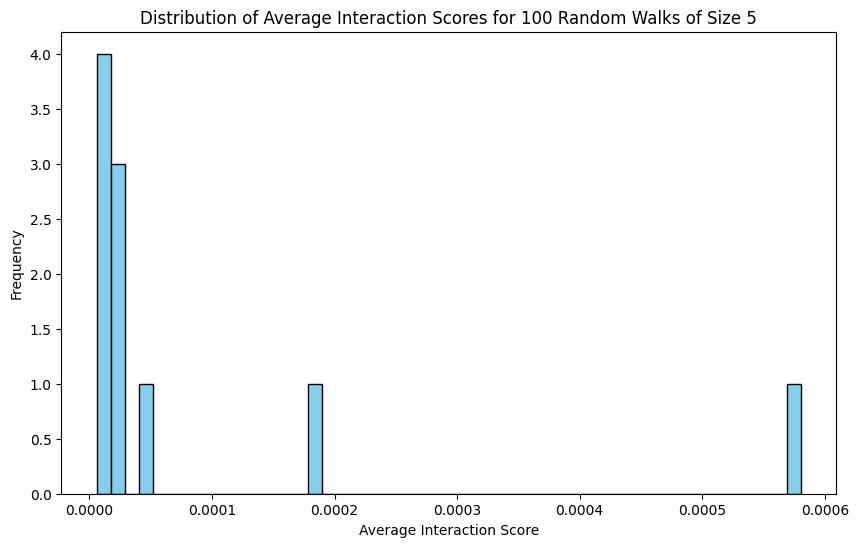

[np.float64(1.8142539792340448e-05),
 np.float64(8.390277650861808e-06),
 np.float64(5.79188944840883e-06),
 np.float64(2.682003076906223e-05),
 np.float64(1.2919044094977636e-05),
 np.float64(4.1472593425295196e-05),
 np.float64(0.00018104060038840201),
 np.float64(2.5954528811798193e-05),
 np.float64(1.4444918324435139e-05),
 np.float64(0.0005806362128498636)]

In [331]:
f.create_background_model_rw(contact_matrix_zero, 5, num_steps=1000, num_molecules=100, num_iterations=10)